<a href="https://colab.research.google.com/github/Shyamala12345/RNN-LSTM/blob/main/stock_price_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
df=pd.read_csv("/content/drive/MyDrive/NTPC.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4088 non-null   object 
 1   Symbol              4088 non-null   object 
 2   Series              4088 non-null   object 
 3   Prev Close          4088 non-null   float64
 4   Open                4088 non-null   float64
 5   High                4088 non-null   float64
 6   Low                 4088 non-null   float64
 7   Last                4088 non-null   float64
 8   Close               4088 non-null   float64
 9   VWAP                4088 non-null   float64
 10  Volume              4088 non-null   int64  
 11  Turnover            4088 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4088 non-null   int64  
 14  %Deliverble         4088 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 479.2

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [6]:
df.shape

(4088, 14)

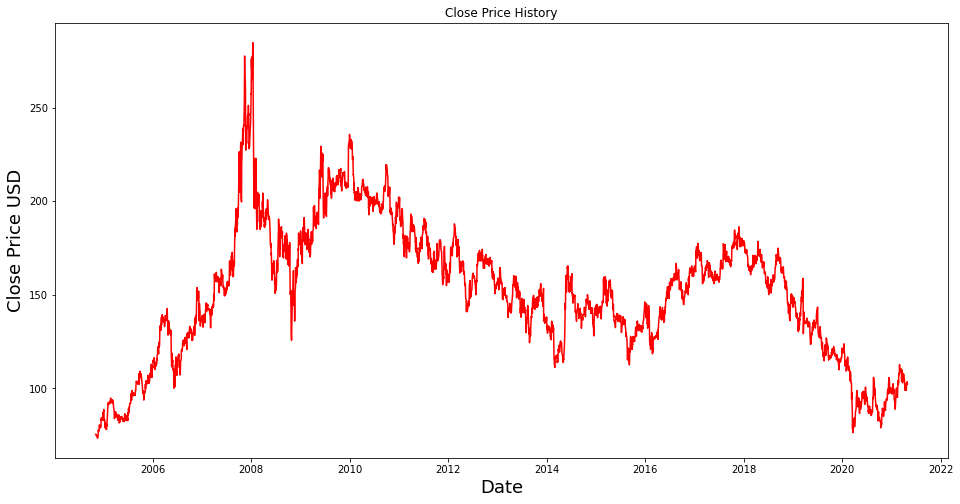

In [7]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

3271

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00947418],
       [0.0078162 ],
       [0.00828991],
       ...,
       [0.1423496 ],
       [0.1397442 ],
       [0.13690194]])

In [11]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00947418, 0.0078162 , 0.00828991, 0.00710564, 0.00426338,
       0.0052108 , 0.00047371, 0.00023685, 0.00047371, 0.        ,
       0.00426338, 0.01089531, 0.02013264, 0.01657982, 0.01776409,
       0.02629086, 0.02913311, 0.03268593, 0.0286594 , 0.03008053,
       0.03268593, 0.03055424, 0.03055424, 0.02581715, 0.0286594 ,
       0.03813359, 0.04997631, 0.04855519, 0.04476551, 0.04594979,
       0.05187115, 0.04547608, 0.04594979, 0.04784462, 0.05447655,
       0.06347703, 0.06395073, 0.05731881, 0.06489815, 0.07081952,
       0.07224064, 0.05352913, 0.04334439, 0.0464235 , 0.04689721,
       0.039081  , 0.026054  , 0.039081  , 0.03600189, 0.0364756 ,
       0.03694931, 0.02960682, 0.02226433, 0.02131691, 0.03434391,
       0.03008053, 0.0412127 , 0.06134533, 0.07389863, 0.07674088])]
[0.08668877309332074]



In [12]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)


In [13]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3211, 60, 1)

In [14]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [15]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
3211/3211 [==============================] - 82s 25ms/step - loss: 0.0014
Epoch 2/10
3211/3211 [==============================] - 78s 24ms/step - loss: 5.7832e-04
Epoch 3/10
3211/3211 [==============================] - 78s 24ms/step - loss: 4.6709e-04
Epoch 4/10
3211/3211 [==============================] - 78s 24ms/step - loss: 4.8430e-04
Epoch 5/10
3211/3211 [==============================] - 79s 25ms/step - loss: 4.2844e-04
Epoch 6/10
3211/3211 [==============================] - 80s 25ms/step - loss: 4.0003e-04
Epoch 7/10
3211/3211 [==============================] - 80s 25ms/step - loss: 4.0980e-04
Epoch 8/10
3211/3211 [==============================] - 80s 25ms/step - loss: 4.1266e-04
Epoch 9/10
3211/3211 [==============================] - 80s 25ms/step - loss: 3.9286e-04
Epoch 10/10
3211/3211 [==============================] - 80s 25ms/step - loss: 3.9724e-04


In [17]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [19]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(817, 60, 1)

In [21]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

26/26 [==============================] - 3s 28ms/step


In [22]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9559516056952597

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


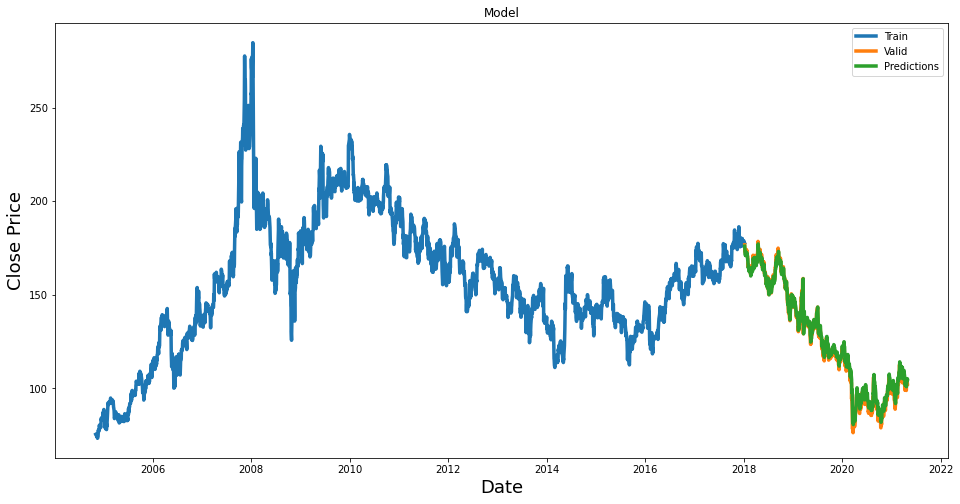

In [23]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [24]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-01-09,176.70,175.963516
2018-01-10,173.95,175.154160
2018-01-11,173.50,172.561707
2018-01-12,172.50,171.804184
2018-01-15,172.95,170.969925
...,...,...
2021-04-26,102.40,103.906105
2021-04-27,102.05,104.526909
2021-04-28,103.60,104.241013


In [25]:
df.tail()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,NTPC,EQ,102.55,103.95,103.95,100.85,102.50,102.40,102.08,24369413,2.487514e+14,66644.0,9190471,0.3771
2021-04-27,NTPC,EQ,102.40,102.05,103.55,101.70,101.85,102.05,102.35,17763436,1.818113e+14,49985.0,7220824,0.4065
2021-04-28,NTPC,EQ,102.05,102.85,103.95,102.15,103.60,103.60,103.15,15160578,1.563882e+14,50680.0,7815042,0.5155
2021-04-29,NTPC,EQ,103.60,104.60,105.00,102.65,102.95,103.05,103.70,11588556,1.201737e+14,38532.0,4040332,0.3486
2021-04-30,NTPC,EQ,103.05,102.25,105.65,102.05,102.40,102.45,103.71,15321193,1.588952e+14,48217.0,4597153,0.3001


In [30]:
#get the quote
ntpc = pd.read_csv("/content/drive/MyDrive/NTPC.csv")
#Create new data frame
new_df = ntpc.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 51ms/step


array([[104.42051]], dtype=float32)